In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.stats import binom

Two types of people:
- moon phase believers
- astro skeptics

Note: There's potentially a third: "reverse" believers, the ones that think full moon are bottoms and new moons are tops. I predict that these people are not that common.

## Question: How do we get astro skeptics to be interested in our system?

Well, these people believe that -- in the long run, market predictions based on astrology would behave completely randomly.

Let's consider an example. In a year there are approximately 12 new moons and 12 full moons in a year. The astrocrypto hypothesis would be that the new moons and full moon represent local bottoms and local tops, respectively. Let this be hypothesis H1. A skeptic would deny this and would think the market would behave entirely randomly. Let this be hypothesis H0.

Let's consider these two hypotheses as answers to the question: **In the next 12 moon cycles, how many astrocrypto predictions will prove correct?**

### Binomial distribution

A bit of a preamble ... Smart respondees to the question would realize they are best to use a [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) to answer their question, where $n = 24$ (12 new moons and 12 full moons) and $p$ represents the probability (their belief) that any given call is correct. Let our skeptic pick $p = 0.5$ and let our believer pick $p = 0.75$.

Say the skeptic and the believer are allowed to pick three values for their prediction. 

The *skeptic* would select values 10-14 with 46% confidence that they are correct.

In [15]:
sum(binom(24, 0.5).pmf(k) for k in range(11, 13+1))

0.45874381065368697

The *believer* would select values 17-19 with 52% confidence that they are correct.

In [16]:
sum(binom(24, 0.75).pmf(k) for k in range(17, 19+1))

0.5195557282383023

In general, the confidence of any of their predictions looks like this:

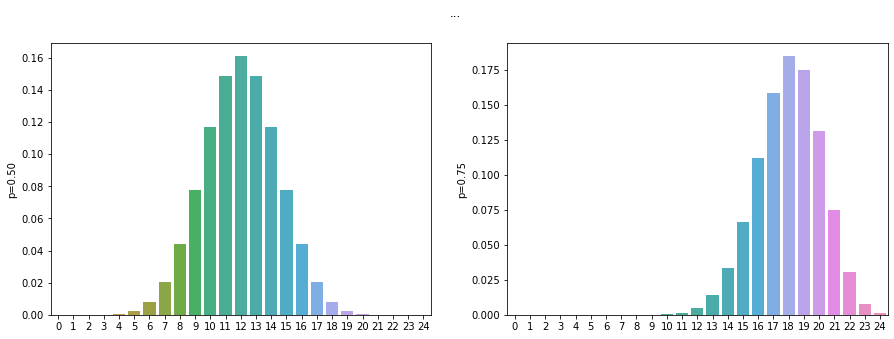

In [38]:
df = pd.DataFrame({
    'p=0.50': [binom(24, 0.5).pmf(k) for k in range(0, 24+1)],
    'p=0.75': [binom(24, 0.75).pmf(k) for k in range(0, 24+1)]
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('...')

sns.barplot(data=df, x=df.index, y="p=0.50", ax=ax1)
sns.barplot(data=df, x=df.index, y="p=0.75", ax=ax2);

## Prediction market

Note that a prediction market built around the question above would look like the left chart *if only skeptics were betting* and would look like the chart on the right *if only believers were betting*. (The extreme values would be the few people of each type betting on an anomaly.)

Much more interestingly, what if the prediction market consisted of 50% believers and 50% skeptics? It would look something like this:

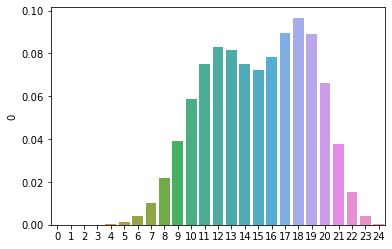

In [51]:
df2 = pd.DataFrame((df['p=0.50'].values + df['p=0.75'].values) / 2)
sns.barplot(data=df2, x=df.index, y=0);

**Battle between skeptics and believers!**

### Prediction market details:

- People would make a bet that represents:
    - (1) their belief in the astrological prediction's accuracy
    - (2) risk profile
    - Note that the user can directly compute their risk using the binomial distribution, what they believe $p$ to be, and how confident they are in their chosen $p$.
    

- Users get paid out throughout the year.
    - Consider: If a believer $B$ thinks all predictions will be accurate with high confidence, they would bet on 24 (correct predictions). Assuming the first prediction of the year (WLOG full moon bottom) fails, then $B$'s bet loses automatically. $B$'s stake would be distributed to all users betting 0-23.
        - Why this is interesting: A user would not have to wait until the end of the year to see payouts from their bet.
        
- You might say: As we get closer to a full/new moon, we can more easily predict if the call will fail/succeed (using technical analysis, for example).
    - We can incentivize people to bet early by making their potential earnings proportional to how early they made the bet. So there's another risk/reward aspect here.

- Liquidity mining etc etc


#### Concluding thought:
I honestly think this would garner users because skeptics would be sure they are correct and thus would be paid out by all the believers betting the right of the distribution. Same for believers. They would be confident that they would be paid out by the skeptics that skew their bets to the center of the distribution.
    
Note:
- This setup can be extended to the context of *any* sequence of "prophesies" that would allow believers and skeptics to be pitted against one another.